# Merging DataFrames

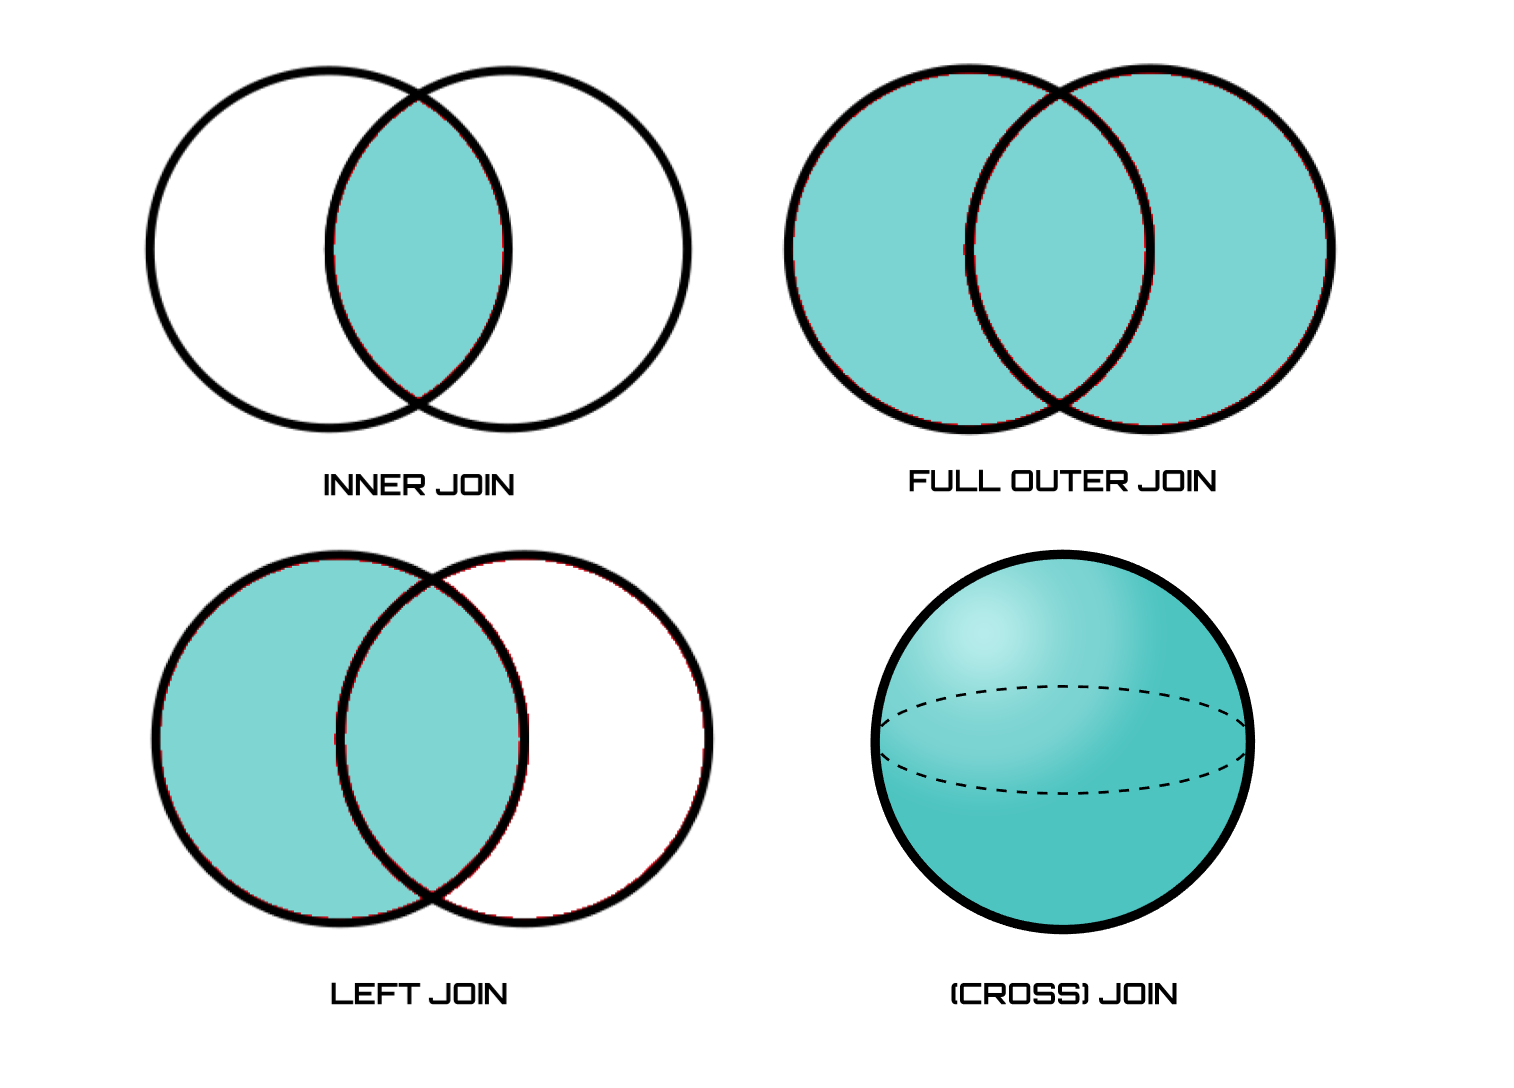

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Creating two dataframes

staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])
staff_df = staff_df.set_index('Name')


student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])
student_df = student_df.set_index('Name')

In [3]:
staff_df.head()

,Role
Name,
Kelly,Director of HR
Sally,Course liasion
James,Grader


In [4]:
student_df.head()

,School
Name,
James,Business
Mike,Law
Sally,Engineering


In [5]:
# There's some overlap in these DataFrames in that James and Sally are both students and staff, but Mike and
# Kelly are not. Importantly, both DataFrames are indexed along the value we want to merge them on, which is
# called Name. 

### UNION or FULL OUTER JOIN

In [6]:
pd.merge(staff_df, student_df, how='outer', left_index=True, right_index=True)  

# index = True makes merge() use the index as the joining key

,Role,School
Name,,
James,Grader,Business
Kelly,Director of HR,NaN
Mike,NaN,Law
Sally,Course liasion,Engineering


### INTERSECTION or INNER JOIN

In [7]:
pd.merge(staff_df, student_df, how='inner', left_index=True, right_index=True)

,Role,School
Name,,
Sally,Course liasion,Engineering
James,Grader,Business


### LEFT JOIN

In [8]:
pd.merge(staff_df, student_df, how='left', left_index=True, right_index=True)

,Role,School
Name,,
Kelly,Director of HR,NaN
Sally,Course liasion,Engineering
James,Grader,Business


### RIGHT JOIN

In [9]:
pd.merge(staff_df, student_df, how='right', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Mike,NaN,Law
Sally,Course liasion,Engineering


### MERGING ON A COLUMN INSTEAD OF THE INDEX

In [10]:
staff_df = staff_df.reset_index()
student_df = student_df.reset_index()

pd.merge(staff_df, student_df, how='right', on='Name')

,Name,Role,School
0,James,Grader,Business
1,Mike,NaN,Law
2,Sally,Course liasion,Engineering


### MERGING WITH REPEATED COLUMN NAMES

In [11]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR', 
                          'Location': 'State Street'},
                         {'Name': 'Sally', 'Role': 'Course liasion', 
                          'Location': 'Washington Avenue'},
                         {'Name': 'James', 'Role': 'Grader', 
                          'Location': 'Washington Avenue'}])

student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business', 
                            'Location': '1024 Billiard Avenue'},
                           {'Name': 'Mike', 'School': 'Law', 
                            'Location': 'Fraternity House #22'},
                           {'Name': 'Sally', 'School': 'Engineering', 
                            'Location': '512 Wilson Crescent'}])

In [12]:
staff_df

,Name,Role,Location
0,Kelly,Director of HR,State Street
1,Sally,Course liasion,Washington Avenue
2,James,Grader,Washington Avenue


In [13]:
student_df

,Name,School,Location
0,James,Business,1024 Billiard Avenue
1,Mike,Law,Fraternity House #22
2,Sally,Engineering,512 Wilson Crescent


In [14]:
# In the staff DataFrame, "location" is an office location where we can find the staff person. But for 
# the student DataFrame, the location information is actually their home address.

# The merge function preserves this information, but appends an _x or _y to help differentiate between which
# index went with which column of data. The _x is always the left DataFrame information, and the _y is always
# the right DataFrame information.

pd.merge(staff_df, student_df, how='left', on='Name')

,Name,Role,Location_x,School,Location_y
0,Kelly,Director of HR,State Street,NaN,NaN
1,Sally,Course liasion,Washington Avenue,Engineering,512 Wilson Crescent
2,James,Grader,Washington Avenue,Business,1024 Billiard Avenue


### MERGING ON MULTIPLE COLUMNS

In [15]:
staff_df = pd.DataFrame([{'First Name': 'Kelly', 'Last Name': 'Desjardins', 
                          'Role': 'Director of HR'},
                         {'First Name': 'Sally', 'Last Name': 'Brooks', 
                          'Role': 'Course liasion'},
                         {'First Name': 'James', 'Last Name': 'Wilde', 
                          'Role': 'Grader'}])

student_df = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Hammond', 
                            'School': 'Business'},
                           {'First Name': 'Mike', 'Last Name': 'Smith', 
                            'School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Brooks', 
                            'School': 'Engineering'}])

In [16]:
staff_df

,First Name,Last Name,Role
0,Kelly,Desjardins,Director of HR
1,Sally,Brooks,Course liasion
2,James,Wilde,Grader


In [17]:
student_df

,First Name,Last Name,School
0,James,Hammond,Business
1,Mike,Smith,Law
2,Sally,Brooks,Engineering


In [18]:
pd.merge(staff_df, student_df, how='inner', on=['First Name','Last Name'])

,First Name,Last Name,Role,School
0,Sally,Brooks,Course liasion,Engineering


# Concatinating DataFrames

If we think of merging as joining "horizontally", meaning we join on similar values in a column found in two dataframes then concatenating is joining "vertically", meaning we put dataframes on top or at the bottom of each other


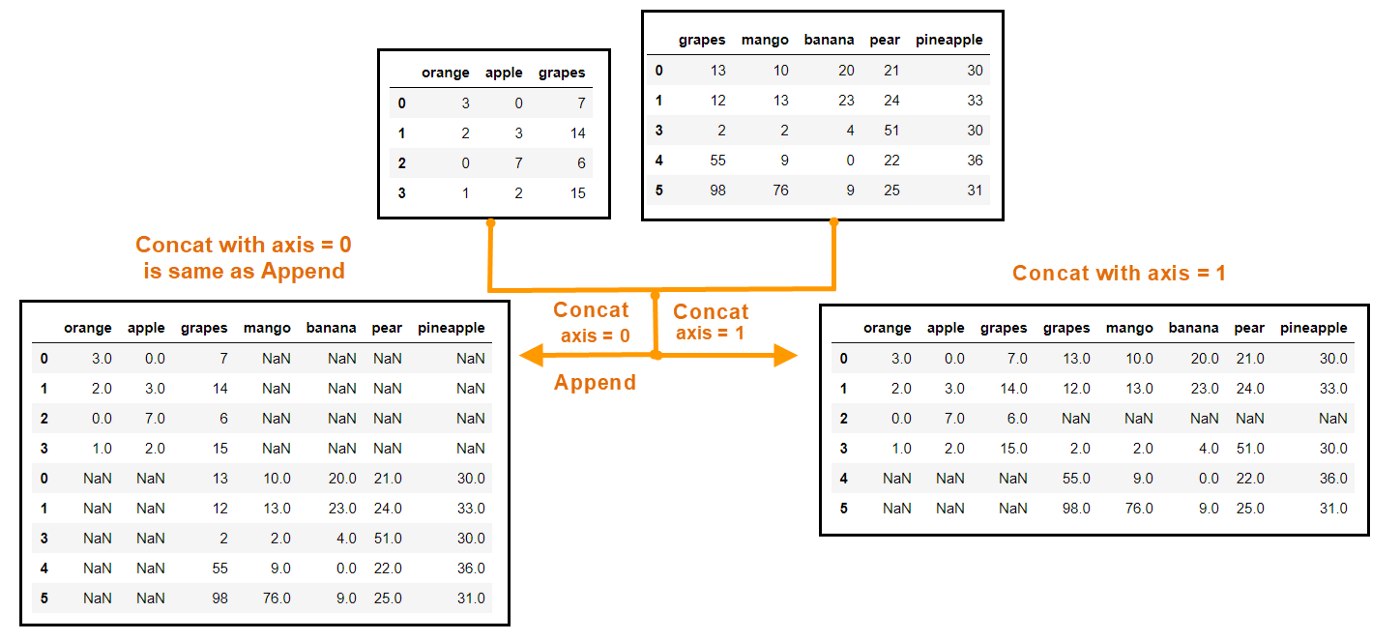

In [19]:
staff_df

,First Name,Last Name,Role
0,Kelly,Desjardins,Director of HR
1,Sally,Brooks,Course liasion
2,James,Wilde,Grader


In [20]:
student_df

,First Name,Last Name,School
0,James,Hammond,Business
1,Mike,Smith,Law
2,Sally,Brooks,Engineering


In [21]:
pd.concat([staff_df,student_df])

,First Name,Last Name,Role,School
0,Kelly,Desjardins,Director of HR,NaN
1,Sally,Brooks,Course liasion,NaN
2,James,Wilde,Grader,NaN
0,James,Hammond,NaN,Business
1,Mike,Smith,NaN,Law
2,Sally,Brooks,NaN,Engineering


In [22]:
pd.concat([staff_df,student_df], axis=1)

,First Name,Last Name,Role,First Name,Last Name,School
0,Kelly,Desjardins,Director of HR,James,Hammond,Business
1,Sally,Brooks,Course liasion,Mike,Smith,Law
2,James,Wilde,Grader,Sally,Brooks,Engineering
